### Imports

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Functions and Classes

In [38]:
def generate_batch(batch_size=32):
    x = np.random.random(batch_size) * 10 - 5
    
    sd = 0.05 + 0.1 * (x+5)
    
    y = np.cos(x) - 0.3 * x + np.random.randn(batch_size) * sd
    
    return x,y

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.ann1 = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10,1),
        )
        self.ann2 = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10,1),
        )    
        
    def forward(self, inputs):
        return self.ann1(inputs), self.ann2(inputs)
    
def criterion(outputs, targets):
    mu = outputs[0]
    v = torch.exp(outputs[1])
    
    c = torch.log(torch.sqrt(2 * np.pi * v))
    
    f = 0.5 / v * (targets - mu) ** 2
    
    nll = torch.mean(c + f)
    
    return nll


def create_and_train_model(n_epochs=5000, batch_size=128):
    model = Model()
    
    optimizer = torch.optim.Adam(model.parameters())
    losses = np.zeros(n_epochs)
    
    
    for i in range(n_epochs):
        x, y = generate_batch(batch_size)
        
        inputs = torch.from_numpy(x).float()
        targets = torch.from_numpy(y).float()
        
        inputs, targets = inputs.view(-1, 1), targets.view(-1, 1)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        losses[i] = loss.item()
        
        if i % 1000 == 0:
            print(i, losses[i])
            
        loss.backward()
        optimizer.step()
        
    return losses, model

def plot_metric(data, metric):
    plt.plot(data, label=metric)
    plt.legend()
    plt.show
    

def plot_uncertainty(x, y, yhat, sd, idx):  
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x[idx], yhat[idx], linewidth=3, color='red')
    plt.fill_between(x[idx], yhat[idx] - sd[idx], yhat[idx] + sd[idx], color='red', alpha=0.3)
    plt.show()
    
    
def predict(model,batch_size):
    x, y = generate_batch(batch_size)
    inputs = torch.from_numpy(x).float()
    targets = torch.from_numpy(y).float() 
    inputs, targets = inputs.view(-1, 1), targets.view(-1, 1)
    
    with torch.no_grad():
        outputs = model(inputs)
        yhat = outputs[0].numpy().flatten()
        sd = np.exp(outputs[1].numpy().flatten() / 2)
        
    idx = np.argsort(x)

    return x, y, yhat, sd, idx

### Generate Data

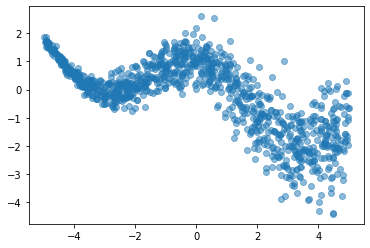

In [6]:
x, y = generate_batch(1024)
plt.scatter(x, y, alpha=0.5);

### Create and train model

In [41]:
batch_size=128

In [42]:
losses, model = create_and_train_model(n_epochs=5000, batch_size=batch_size)

0 1.5544743537902832
1000 1.0317447185516357
2000 0.8531936407089233
3000 0.7727764844894409
4000 0.6753940582275391


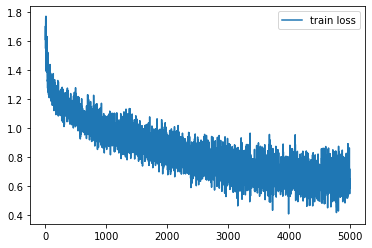

In [43]:
plot_metric(losses, "train loss")

In [47]:
x, y, yhat, sd, idx = predict(model,batch_size=1024)

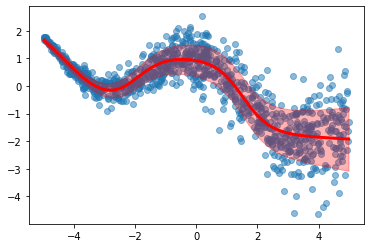

In [48]:
plot_uncertainty(x, y, yhat, sd, idx);